In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [72]:
df = pd.read_pickle('Task1_dm_rf.pkl')

In [ ]:
# -- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [111]:
df1 = pd.DataFrame(df, columns=['region', 'objPriceAvg']).dropna()
df1

,region,objPriceAvg
0,72,55893.0
1,72,53109.0
2,72,47886.0
3,72,45523.0
4,72,50768.0
...,...,...
10743,50,85604.0
10744,50,85309.0
10745,50,85634.0
10746,76,70681.0


In [112]:
avg_by_region = df1.groupby(['region']).mean()
avg_by_region

,objPriceAvg
region,
1,65396.864865
2,83807.942708
3,70159.300000
4,83012.400000
5,29344.307692
...,...
78,189533.090698
86,93208.909091
89,97163.142857


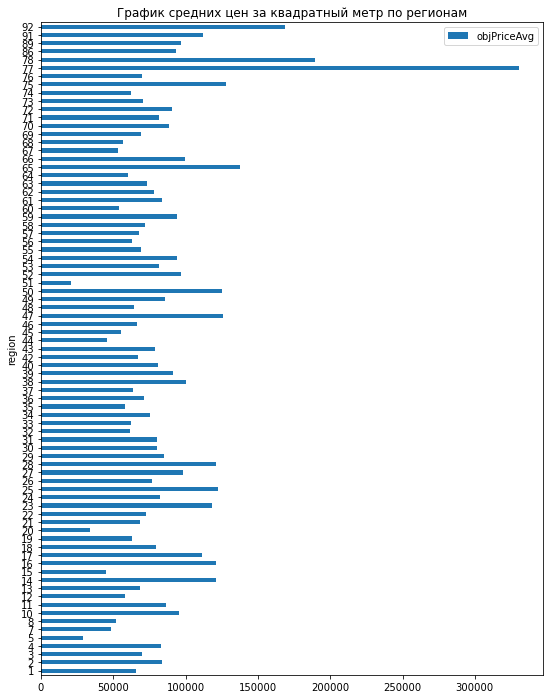

In [256]:
avg_by_region.plot(kind='barh', title='График средних цен за квадратный метр по регионам')
rcParams['figure.figsize'] = 9,12
plt.show()

In [ ]:
# -- Рассчитать объемы вводимого жилья по регионам и по годам. 

In [123]:
# создание столбца year, оставляем только год
df["ready_year"] = pd.to_datetime(df.objReady100PercDt, format='%Y-%m-%d').dt.strftime('%Y')

In [124]:
df2 = pd.DataFrame(df, columns=['region', 'ready_year'])

In [228]:
# cnt_by_region = df2.groupby(['region', 'ready_year'])['ready_year'].count()
cnt_by_region = df2.groupby(['region', 'ready_year']).size()
cnt_by_region

region  ready_year
1       2022           3
        2023          19
        2024          20
        2025           1
2       2022          77
                      ..
91      2028           1
92      2022           2
        2023           3
        2024          11
        2025           5
Length: 457, dtype: int64

<AxesSubplot:title={'center':'График ввода жилья по годам в регионе: 1'}, xlabel='ready_year'>

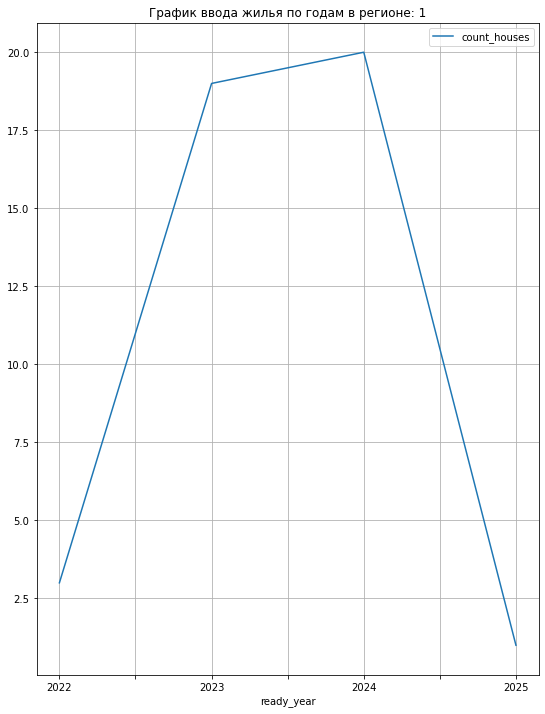

In [248]:
df_cnt = cnt_by_region.reset_index()
df_cnt.rename(columns={0: 'count_houses'}, inplace=True)

# Выюирая регион можно построить график ввода жилья
number_region = 1
df_cnt[df_cnt.region == number_region].plot( x='ready_year', y='count_houses', title=f'График ввода жилья по годам в регионе: {number_region}', grid=True)

In [91]:
# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах 

In [257]:
df3 = pd.DataFrame(df, columns=['region', 'objFloorCnt', 'objFlatCnt', 'objFlatSq', 'objElemParkingCnt', 'objPriceAvg']).dropna()
df3

,region,objFloorCnt,objFlatCnt,objFlatSq,objElemParkingCnt,objPriceAvg
0,72,12,44,4297.44,41,55893.0
1,72,20,68,6296.55,31,53109.0
2,72,10,43,4812.98,0,47886.0
3,72,12,65,6248.51,0,45523.0
4,72,1,0,0.0,125,50768.0
...,...,...,...,...,...,...
10743,50,26,288,14870.4,0,85604.0
10744,50,26,768,29620.1,0,85309.0
10745,50,26,312,14872.8,0,85634.0
10746,76,6,127,6764.22,0,70681.0


In [267]:
df4 = df3.groupby(['region']).mean()
df4

,objFloorCnt,objFlatCnt,objElemParkingCnt,objPriceAvg
region,,,,
1,7.459459,124.567568,21.810811,65396.864865
2,17.005208,244.135417,28.796875,83807.942708
3,14.025000,141.350000,11.425000,70159.300000
4,9.000000,87.000000,6.000000,83012.400000
5,13.307692,217.230769,0.000000,29344.307692
...,...,...,...,...
78,13.527907,360.532558,73.786047,189533.090698
86,10.969697,172.060606,32.848485,93208.909091
89,6.000000,75.952381,0.000000,97163.142857


array([<AxesSubplot:xlabel='region'>, <AxesSubplot:xlabel='region'>,
       <AxesSubplot:xlabel='region'>, <AxesSubplot:xlabel='region'>],
      dtype=object)

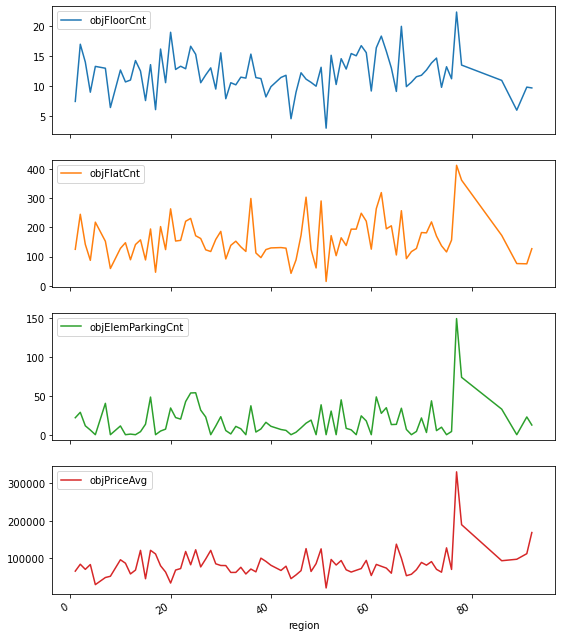

In [270]:
df4.plot(subplots=True, legend= True)